# EXPLORATORY DATA ANALYSIS OF WINE REVIEWS

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Description:

In [2]:
df=pd.read_csv('wine-reviews.csv')

In [3]:
df.sample(5)

,title,country,province,variety,winery,points,price
43573,Vila 2012 Reserva Malbec (Mendoza),Argentina,Mendoza Province,Malbec,Vila,84,10.0
50614,Henschke 2006 Johann's Garden Red (Barossa),Australia,South Australia,Rhône-style Red Blend,Henschke,91,40.0
95855,Symington Family Estates 2007 Tuella White (Do...,Portugal,Douro,Portuguese White,Symington Family Estates,84,13.0
110996,Cartlidge & Browne 1998 Zinfandel (California),US,California,Zinfandel,Cartlidge & Browne,87,10.0
81501,Pierre-Luc Bouchaud 2016 Pont Caffino Sur Lie ...,France,Loire Valley,Melon,Pierre-Luc Bouchaud,88,15.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   title     129971 non-null  object 
 1   country   129908 non-null  object 
 2   province  129908 non-null  object 
 3   variety   129970 non-null  object 
 4   winery    129971 non-null  object 
 5   points    129971 non-null  int64  
 6   price     120975 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 6.9+ MB


In [5]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Data Exploration:

In [6]:
df.isnull().sum()

title          0
country       63
province      63
variety        1
winery         0
points         0
price       8996
dtype: int64

In [7]:
df[df.duplicated(['title','country'], keep=False)]

,title,country,province,variety,winery,points,price
9,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,France,Alsace,Pinot Gris,Jean-Baptiste Adam,87,27.0
10,Kirkland Signature 2011 Mountain Cuvée Caberne...,US,California,Cabernet Sauvignon,Kirkland Signature,87,19.0
11,Leon Beyer 2012 Gewurztraminer (Alsace),France,Alsace,Gewürztraminer,Leon Beyer,87,30.0
12,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,US,California,Cabernet Sauvignon,Louis M. Martini,87,34.0
13,Masseria Setteporte 2012 Rosso (Etna),Italy,Sicily & Sardinia,Nerello Mascalese,Masseria Setteporte,87,NaN
...,...,...,...,...,...,...,...
129879,Maison Bleue 2013 Metis Red (Columbia Valley (...,US,Washington,Red Blend,Maison Bleue,90,20.0
129880,Martin Ray 2015 Chardonnay (Russian River Valley),US,California,Chardonnay,Martin Ray,90,20.0
129881,Martinsancho 2015 Verdejo (Rueda),Spain,Northern Spain,Verdejo,Martinsancho,90,19.0
129882,Matthews 2012 Reserve Red (Columbia Valley (WA)),US,Washington,Bordeaux-style Red Blend,Matthews,90,60.0


In [8]:
df.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


Text(0, 0.5, 'Count')

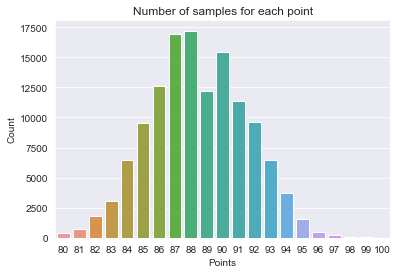

In [9]:
sns.set_style(style='darkgrid')
sns.countplot(data=df,x='points')
plt.title("Number of samples for each point")
plt.xlabel("Points")
plt.ylabel("Count")

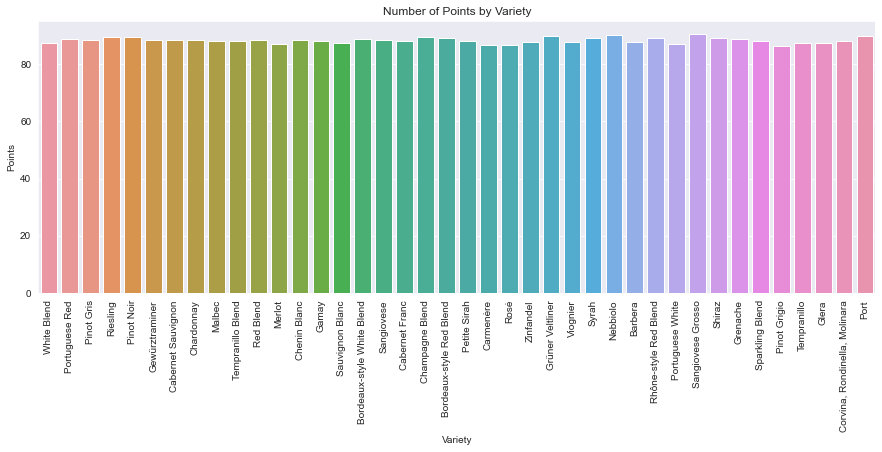

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='variety',y='points', data=df[df.variety.isin(df.variety.value_counts()[:40].index)], ci = 0)
plt.title("Number of Points by Variety")
plt.xlabel("Variety")
plt.ylabel("Points")
plt.xticks(rotation=90)
plt.show()

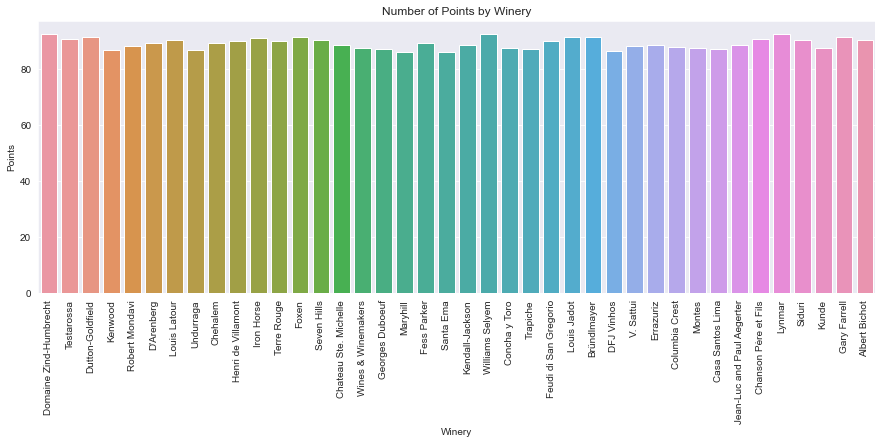

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x='winery',y='points', data=df[df.winery.isin(df.winery.value_counts()[:40].index)], ci = 0)
plt.title("Number of Points by Winery")
plt.xlabel("Winery")
plt.ylabel("Points")
plt.xticks(rotation=90)
plt.show()

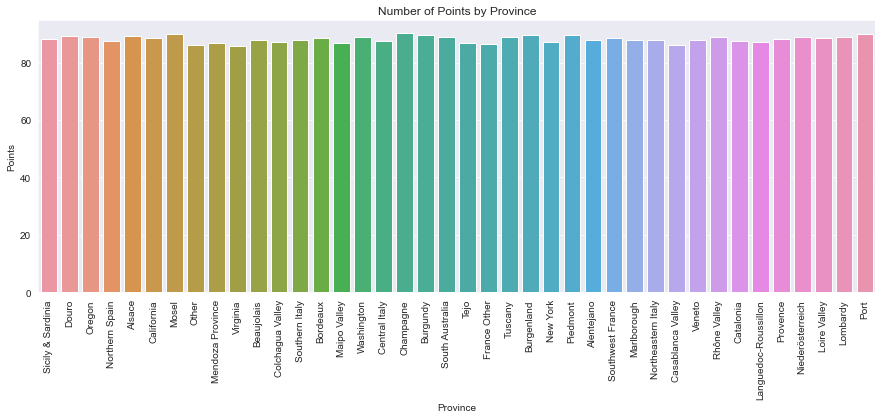

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x='province',y='points', data=df[df.province.isin(df.province.value_counts()[:40].index)], ci = 0)
plt.title("Number of Points by Province")
plt.xlabel("Province")
plt.ylabel("Points")
plt.xticks(rotation=90)
plt.show()

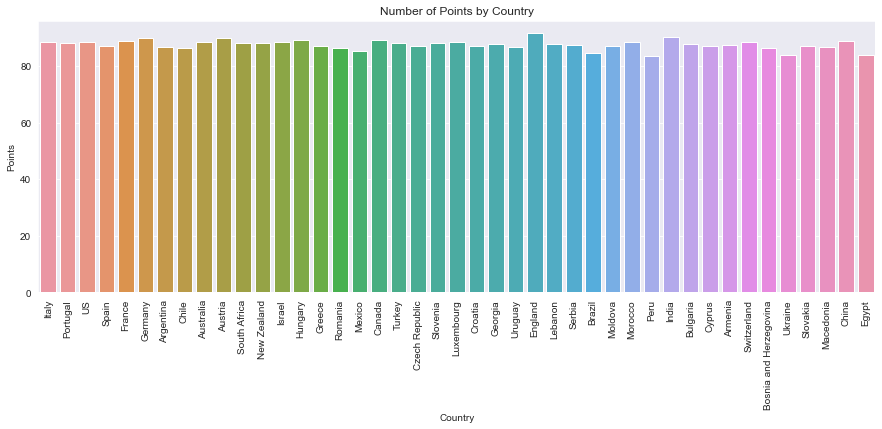

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='country',y='points' , ci = 0)
plt.title("Number of Points by Country")
plt.xlabel("Country")
plt.ylabel("Points")
plt.xticks(rotation=90)
plt.show()

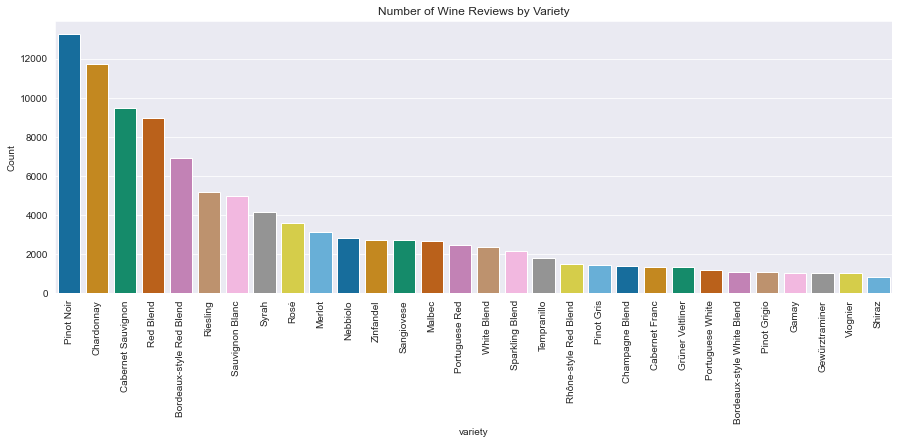

In [14]:
plt.subplots(figsize=(15,5))
sns.countplot('variety', data=df, palette='colorblind',orient='h', order=df['variety'].value_counts().head(30).index)
plt.xticks(rotation=90)
plt.title('Number of Wine Reviews by Variety')
plt.xlabel("variety")
plt.ylabel("Count")
plt.show()

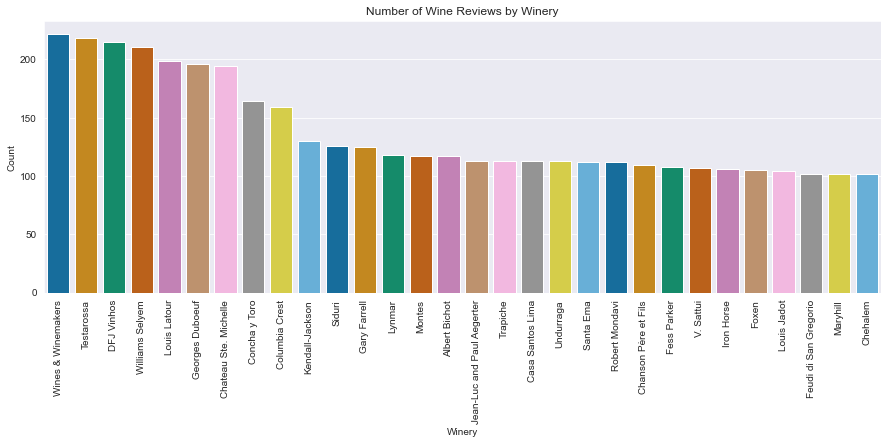

In [15]:
plt.subplots(figsize=(15,5))
sns.countplot('winery', data=df, palette='colorblind',orient='h', order=df['winery'].value_counts().head(30).index)
plt.xticks(rotation=90)
plt.title('Number of Wine Reviews by Winery')
plt.xlabel("Winery")
plt.ylabel("Count")
plt.show()

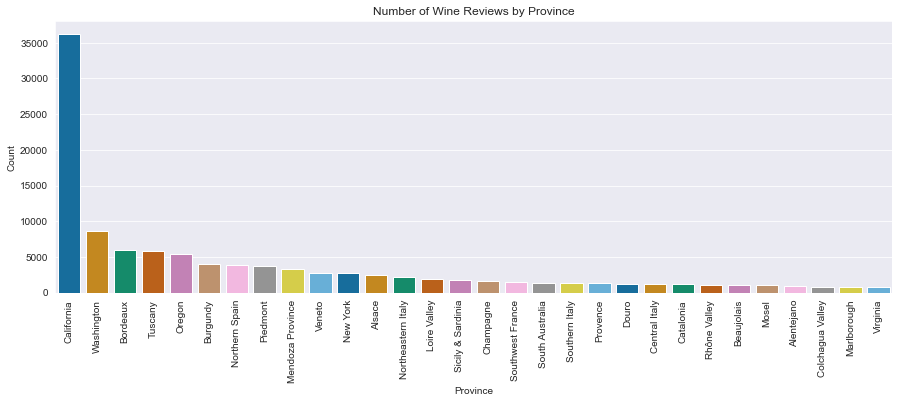

In [16]:
plt.subplots(figsize=(15,5))
sns.countplot('province', data=df, palette='colorblind',orient='h', order=df['province'].value_counts().head(30).index)
plt.xticks(rotation=90)
plt.title('Number of Wine Reviews by Province')
plt.xlabel("Province")
plt.ylabel("Count")
plt.show()

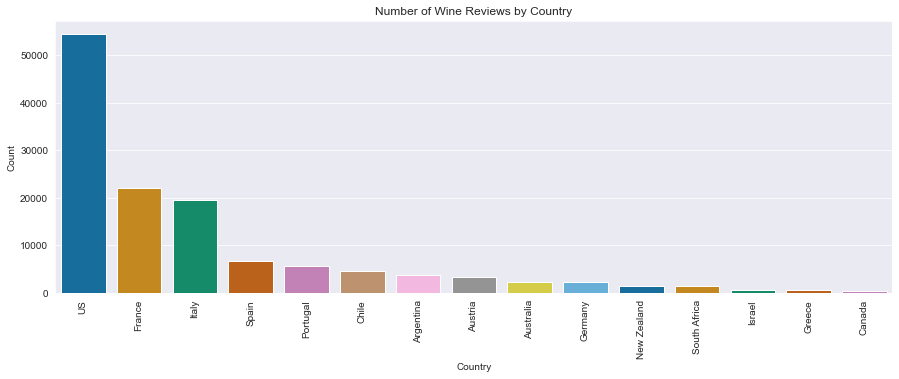

In [17]:
plt.subplots(figsize=(15,5))
sns.countplot('country', data=df, palette='colorblind',orient='h', order=df['country'].value_counts().head(15).index)
plt.xticks(rotation=90)
plt.title('Number of Wine Reviews by Country')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

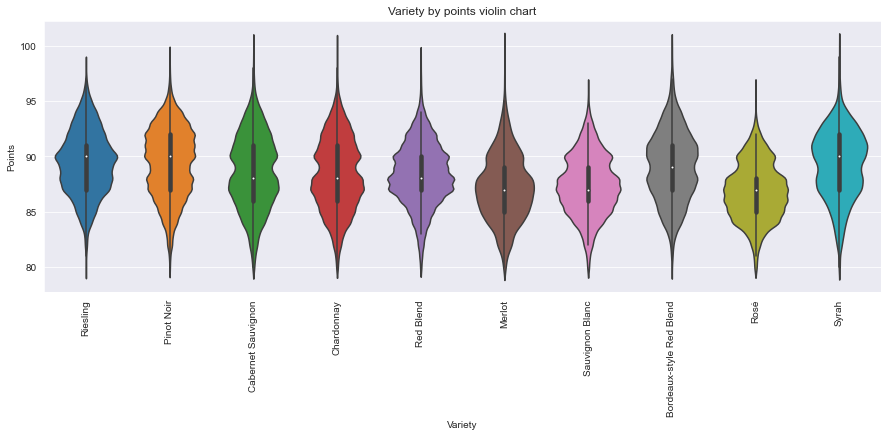

In [18]:
plt.subplots(figsize =(15,5))
sns.violinplot(x='variety', y='points',data=df[df.variety.isin(df.variety.value_counts()[:10].index)])
plt.title("Variety by points violin chart")
plt.xlabel("Variety")
plt.ylabel("Points")
plt.xticks(rotation=90)
plt.show()

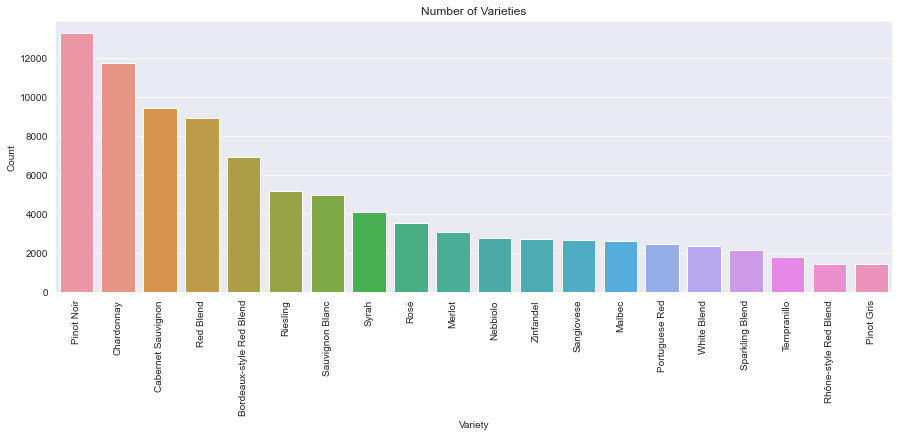

In [19]:
plt.subplots(figsize =(15,5))
sns.countplot(x="variety", data=df[df.variety.isin(df.variety.value_counts()[:20].index)], order=df['variety'].value_counts()[:20].index)
plt.title("Number of Varieties")
plt.xlabel("Variety")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

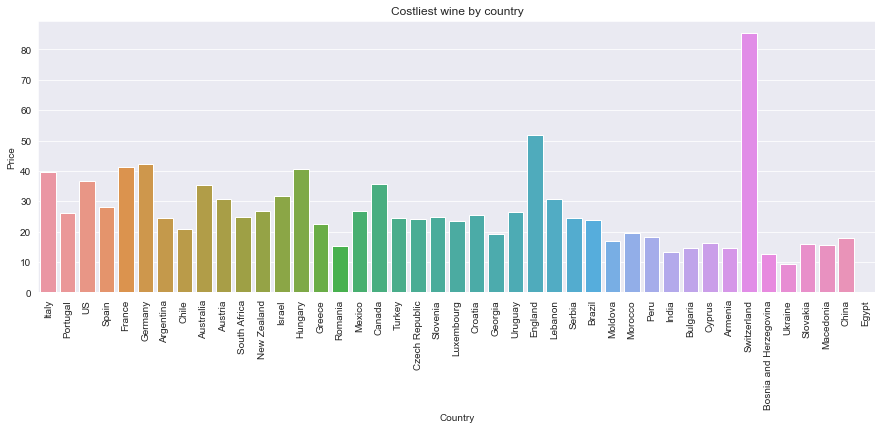

In [20]:
plt.subplots(figsize =(15,5))
sns.barplot(x='country', y='price',data=df, ci = 0)
plt.title("Costliest wine by country")
plt.xlabel("Country")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

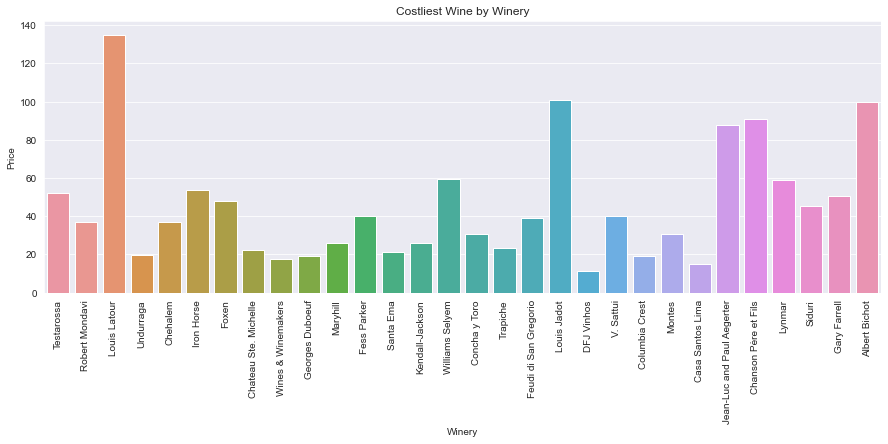

In [21]:
plt.subplots(figsize =(15,5))
sns.barplot(x='winery', y='price',data=df[df.winery.isin(df.winery.value_counts()[:30].index)], ci = 0)
plt.title("Costliest Wine by Winery")
plt.xlabel("Winery")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

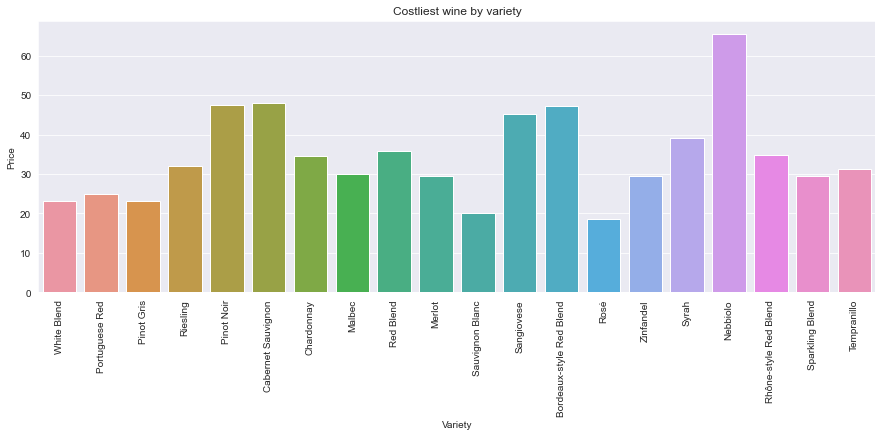

In [22]:
plt.subplots(figsize =(15,5))
sns.barplot(x='variety', y='price',data=df[df.variety.isin(df.variety.value_counts()[:20].index)], ci = 0)
plt.title("Costliest wine by variety")
plt.xlabel("Variety")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

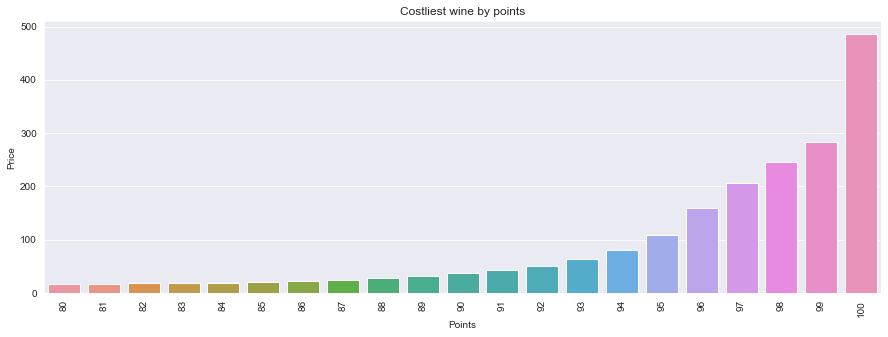

In [23]:
plt.subplots(figsize =(15,5))
sns.barplot(x='points', y='price',data=df, ci = 0)
plt.title("Costliest wine by points")
plt.xlabel("Points")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()